In [1]:
import numpy as np

## 00.Matrix

In [2]:
A = np.array([[1,4,2,8],
            [9,5,0,0],
            [4,0,2,4],
            [6,1,8,3]])

B = np.array([15,19,26,44])

# 0이 아니기 때문에 역행렬 존재
print('det = ',np.linalg.det(A))

det =  1797.9999999999995


### solver

In [3]:
x = np.linalg.solve(A,B)
x

array([ 3.31368187, -2.16462736,  2.57285873,  1.89988877])

### inverse

In [4]:
x = np.dot(np.linalg.inv(A),B)
x

array([ 3.31368187, -2.16462736,  2.57285873,  1.89988877])

## 01.tuple

In [5]:
data1 = ('A','B')
data2 = ('C',)
data3 = data1 + data2
data3

('A', 'B', 'C')

In [6]:
data1 = ('A','B')
data1_list = list(data1)
data1_list.append('C')
data1_list = tuple(data1_list)
data1_list

('A', 'B', 'C')

## 02.Numpy Array

In [7]:
n = 8

for i in range(n):
    for j in range(n):
        temp_data = (i*n)+j
        print("{0:<5}".format(temp_data),end='')
    print()

0    1    2    3    4    5    6    7    
8    9    10   11   12   13   14   15   
16   17   18   19   20   21   22   23   
24   25   26   27   28   29   30   31   
32   33   34   35   36   37   38   39   
40   41   42   43   44   45   46   47   
48   49   50   51   52   53   54   55   
56   57   58   59   60   61   62   63   


In [8]:
n = 8
data = []
for i in range(n):
    temp_list=[]
    for j in range(n):
        temp_list.append((i*n)+j)
    data.append(temp_list)
data

[[0, 1, 2, 3, 4, 5, 6, 7],
 [8, 9, 10, 11, 12, 13, 14, 15],
 [16, 17, 18, 19, 20, 21, 22, 23],
 [24, 25, 26, 27, 28, 29, 30, 31],
 [32, 33, 34, 35, 36, 37, 38, 39],
 [40, 41, 42, 43, 44, 45, 46, 47],
 [48, 49, 50, 51, 52, 53, 54, 55],
 [56, 57, 58, 59, 60, 61, 62, 63]]

## 03. Numpy Array

In [9]:
n = 3

for i in range(n):
    for j in range(n):
        print(f'   {(i*n)+j}',end='')

   0   1   2   3   4   5   6   7   8

In [10]:
data = np.array(data).reshape(-1)
data

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

## 04.IMAGE_EXPAND_DIM

In [11]:
import cv2

image = cv2.imread('my_image.jpg')
image.shape

(200, 150, 3)

In [12]:
image_batch = image.reshape(1,200,150,3)
image_batch.shape

(1, 200, 150, 3)

In [13]:
image_batch = np.expand_dims(image, axis=0)
image_batch.shape

(1, 200, 150, 3)

### transpose

In [14]:
image_batch = np.transpose(image)
image_batch = np.expand_dims(image, axis=0)
image_batch.shape

(1, 200, 150, 3)

In [18]:
image_batch = np.transpose(image, (2,0,1))
image_batch = np.expand_dims(image, axis=0)
image_batch.shape

(1, 200, 150, 3)

## 05.Convolution

In [19]:
import cv2
import numpy as np

In [20]:
## 원본 이미지와 높이와 너비
img = cv2.imread('my_image.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#img = cv2.resize(img,(600,600))
height = img.shape[0]
width = img.shape[1]
channel = img.shape[2]
img.shape

(200, 150, 3)

In [21]:
## 출력 이미지와 높이와 너비
img_result = np.zeros((img.shape[0],img.shape[1],img.shape[2]))
height_result = img_result.shape[0]
width_result = img_result.shape[1]
channel_result = img_result.shape[2]

## 패딩된 이미지와 높이와 너비
img_padding = np.zeros((img.shape[0]+2,img.shape[1]+2,img.shape[2]))
height_padding = img_padding.shape[0]
width_padding = img_padding.shape[1]
channel_padding = img_padding.shape[2]

## 커널(필터)의 높이와 너비
kernel = np.array([[1,1,1],[1,-8,1],[1,1,1]])
height_kernel = kernel.shape[0]
width_kernel = kernel.shape[1]

In [22]:
## 패딩된 이미지에 원본 이미지 복사
for c in range(channel):
    for h in range(height):
        for w in range(width):
            img_padding[h+1][w+1][c] = img[h][w][c]

In [23]:
## 회선 연산
for c in range(channel_padding):
    for h in range(1,height_padding-1):
        for w in range(1,width_padding-1):
            temp_result = 0
            for hk in range(height_kernel):
                for wk in range(width_kernel):
                    temp_result = temp_result + (img_padding[h-1+hk][w-1+wk][c] * kernel[hk][wk])
            img_result[h-1][w-1][c] = temp_result
            temp_result = 0

In [24]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


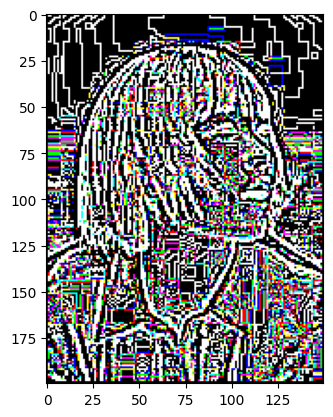

In [25]:
plt.imshow(img_result)

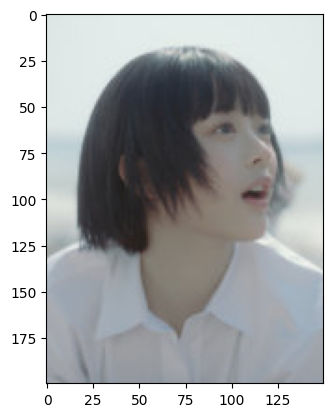

In [26]:
plt.imshow(img)